# Ejercicios Pair Programming 
## Lección 14 - Regresión Logística Preprocesado

Usando el mismo dataset que usatéis ayer, los objetivos de los ejercicios de hoy son:

In [339]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd


# Gráficos
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns


# Estandarización variables numéricas y Codificación variables categóricas
# ------------------------------------------------------------------------------
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder # para realizar el Label Encoding 
from sklearn.preprocessing import OneHotEncoder  # para realizar el One-Hot Encoding

# Gestión datos desbalanceados
# ------------------------------------------------------------------------------
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTETomek

# Para separar los datos en train y test
# ------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split

#  Gestión de warnings
# ------------------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

In [340]:
# Cargamos el dataframe
df = pd.read_csv("resultados_estudiantes_limpio.csv", index_col=0)

In [341]:
df.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,0,group B,bachelor's degree,standard,none,72,72,74
1,0,group C,some college,standard,completed,69,90,88
2,0,group B,master's degree,standard,none,90,95,93
3,1,group A,associate's degree,free/reduced,none,47,57,44
4,1,group C,some college,standard,none,76,78,75


Estandarizar las variables numéricas de vuestro set de datos

Utilizaremos el método Standar Escaler ya que no tenemos outliers para estandarizar nuestras variables numéricas.

In [342]:
# Creamos una copia de nuestro dataframe para tener los datos estandarizados en otro dataframe.
df_estandarizado = df.copy()

In [343]:
# Iniciamos el método para escalar.

scaler = StandardScaler()

In [344]:
# Crearemos un dataframe para las variables predictoras numéricas

numericas = df_estandarizado.select_dtypes(include = np.number)
numericas.drop(["gender"], axis = 1, inplace = True)
numericas.head()

,math_score,reading_score,writing_score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75


In [345]:
# Ajustamos nuestros datos.  

scaler.fit(numericas)

# Realizamos la transformación.

X_escaladas = scaler.transform(numericas)

# Convertimos a dataframe el array obtenido. 

numericas_estandar = pd.DataFrame(X_escaladas, columns = numericas.columns)
numericas_estandar.head(2)

,math_score,reading_score,writing_score
0,0.374672,0.170737,0.375773
1,0.166770,1.450511,1.336613


In [346]:
# Eliminamos las columnas sin estandarizar.

df_estandarizado.drop(["math_score", "reading_score", "writing_score"], axis = 1, inplace=True)
df_estandarizado.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course
0,0,group B,bachelor's degree,standard,none
1,0,group C,some college,standard,completed
2,0,group B,master's degree,standard,none
3,1,group A,associate's degree,free/reduced,none
4,1,group C,some college,standard,none


In [347]:
# Realizamos un concat para unir las columnas estandarizadas.

df_estandarizado = pd.concat([df_estandarizado, numericas_estandar], axis = 1)
df_estandarizado.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,0.0,group B,bachelor's degree,standard,none,0.374672,0.170737,0.375773
1,0.0,group C,some college,standard,completed,0.166770,1.450511,1.336613
2,0.0,group B,master's degree,standard,none,1.622085,1.806004,1.679770
3,1.0,group A,associate's degree,free/reduced,none,-1.357846,-0.895741,-1.683170
4,1.0,group C,some college,standard,none,0.651875,0.597329,0.444404


In [348]:
# En este paso crearemos una copia del dataframe estandarizado para quedarnos solamente con las variables estandarizadas

df_estandarizado_solo = df_estandarizado.copy()
df_estandarizado_solo.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,0.0,group B,bachelor's degree,standard,none,0.374672,0.170737,0.375773
1,0.0,group C,some college,standard,completed,0.166770,1.450511,1.336613
2,0.0,group B,master's degree,standard,none,1.622085,1.806004,1.679770
3,1.0,group A,associate's degree,free/reduced,none,-1.357846,-0.895741,-1.683170
4,1.0,group C,some college,standard,none,0.651875,0.597329,0.444404


Codificar las variables categóricas. Recordad que tendréis que tener en cuenta si vuestras variables tienen orden o no.

In [349]:
df_estandarizado.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,0.0,group B,bachelor's degree,standard,none,0.374672,0.170737,0.375773
1,0.0,group C,some college,standard,completed,0.166770,1.450511,1.336613
2,0.0,group B,master's degree,standard,none,1.622085,1.806004,1.679770
3,1.0,group A,associate's degree,free/reduced,none,-1.357846,-0.895741,-1.683170
4,1.0,group C,some college,standard,none,0.651875,0.597329,0.444404


In [350]:
df_estandarizado["race/ethnicity"].unique()

array(['group B', 'group C', 'group A', 'group D', 'group E', nan],
      dtype=object)

Hemos decidido esta columna que no tiene orden, ya que no le damos más importancia a un grupo que a otro. Utilizaremos el método One-Hot Encoding.

In [351]:
df_estandarizado["parental_level_of_education"].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school', nan],
      dtype=object)

Hemos decidido que esta variable categórica tiene orden, ya que al nivel de estudios parentales le damos importancia en cuanto a lo que hemos visto reflejado en las gráficas con respecto a su influencia en las notas de las personas analizadas.

Nuestro orden será:

0 - some high school, 1 - high school, 2 - associate´s degree, 3 - master´s degree, 4 - some college, 5 - bachelor´s degree.

Utilizaremos el método de pandas "map" para darle un orden a nuestras etiquetas.

In [352]:
df_estandarizado["lunch"].unique()

array(['standard', 'free/reduced', nan], dtype=object)

Hemos decidido que esta variable categórica no tiene orden (entendemos que "standard" es almuerzo normal y "free/reduced" es almuerzo bajo en grasas y azúcares). 

Utilizaremos el método "get_dummies" para esta categoría.

In [353]:
df_estandarizado["test_preparation_course"].unique()

array(['none', 'completed', nan], dtype=object)

Hemos decidido que esta variable categórica si tiene orden (entendemos que "none" es no haber completado el curso preparatorio y "completed" es haber completado el curso preparatorio)

Utilizaremos el método "Label Encoding" para asignar un número a cada valor único.

In [354]:
# Comprobamos que al estandarizar se nos han creado 11 nulos. Al tener muchos datos eliminaremos dichos nulos,
# ya que aparece en todas las columnas el mismo número.
df_estandarizado.isnull().sum()

gender                         11
race/ethnicity                 11
parental_level_of_education    11
lunch                          11
test_preparation_course        11
math_score                     11
reading_score                  11
writing_score                  11
dtype: int64

In [355]:
df_estandarizado.dropna(how = "any", axis=0, inplace = True)

In [356]:
df_estandarizado.isnull().sum()

gender                         0
race/ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

### Realización de Codificación

One Hot Encoding para la variable "race"

In [357]:
def one_hot_encoder_one(df,columna,keep_first=True):
    
    # iniciamos el método de OneHot Encoder
    oh = OneHotEncoder()
    
    # hacemos la codificación de los datos para la variable dada 
    transformados = oh.fit_transform(df[[columna]])
    
    # convertimos nuestro array con la codificación hecha en un dataframe
    oh_df = pd.DataFrame(transformados.toarray())
    
    # el método get_feature_names nos va a dar el nombre de las columnas nuevas que se nos generarán
    oh_df.columns = oh.get_feature_names_out()
    
    # concatenamos el dataframe original con el dataframe que acabamos de crear
    final = pd.concat([df,oh_df],axis=1)
    
    # eliminamos la columna original 
    final.drop(columna, axis = 1,  inplace = True)
    return final

In [358]:
df_estandarizado = one_hot_encoder_one(df_estandarizado, "race/ethnicity")
df_estandarizado.head()

,gender,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E
0,0.0,bachelor's degree,standard,none,0.374672,0.170737,0.375773,0.0,1.0,0.0,0.0,0.0
1,0.0,some college,standard,completed,0.166770,1.450511,1.336613,0.0,0.0,1.0,0.0,0.0
2,0.0,master's degree,standard,none,1.622085,1.806004,1.679770,0.0,1.0,0.0,0.0,0.0
3,1.0,associate's degree,free/reduced,none,-1.357846,-0.895741,-1.683170,1.0,0.0,0.0,0.0,0.0
4,1.0,some college,standard,none,0.651875,0.597329,0.444404,0.0,0.0,1.0,0.0,0.0


In [359]:
df_estandarizado.isnull().sum()

gender                         10
parental_level_of_education    10
lunch                          10
test_preparation_course        10
math_score                     10
reading_score                  10
writing_score                  10
race/ethnicity_group A         10
race/ethnicity_group B         10
race/ethnicity_group C         10
race/ethnicity_group D         10
race/ethnicity_group E         10
dtype: int64

En este apartado vemos que nos aparecen nuevos nulos tras realizar el encoding de race. Esto se debe a que los grupos F y G, como vimos en las gráficas de distribución de EDA, no estaban representados en el conjunto de datos, por lo que al realizar el encoding a los distintos grupos nos habría puesto nulos cuando se encuentra a dichos grupos. 

Procederemos a eliminar esos nulos sin problemas ya que no nos afectan a nuestro análisis.

In [360]:
df_estandarizado.dropna(how="any", axis=0, inplace=True)

In [361]:
df_estandarizado.isnull().sum()

gender                         0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
race/ethnicity_group A         0
race/ethnicity_group B         0
race/ethnicity_group C         0
race/ethnicity_group D         0
race/ethnicity_group E         0
dtype: int64

### Método Pandas  Map para la variable categórica "parental level of education"

In [362]:
df_estandarizado["parental_level_of_education"].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [363]:
mapa = {"some high school": 0, "high school":1, "associate's degree": 2, "some college":3, "bachelor's degree": 4, "master's degree":5}

In [364]:
df_estandarizado["parental_level_of_education"] = df_estandarizado["parental_level_of_education"].map(mapa)

In [365]:
df_estandarizado.head()

,gender,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E
0,0.0,4,standard,none,0.374672,0.170737,0.375773,0.0,1.0,0.0,0.0,0.0
1,0.0,3,standard,completed,0.166770,1.450511,1.336613,0.0,0.0,1.0,0.0,0.0
2,0.0,5,standard,none,1.622085,1.806004,1.679770,0.0,1.0,0.0,0.0,0.0
3,1.0,2,free/reduced,none,-1.357846,-0.895741,-1.683170,1.0,0.0,0.0,0.0,0.0
4,1.0,3,standard,none,0.651875,0.597329,0.444404,0.0,0.0,1.0,0.0,0.0


### Get_dummies para la variable categórica "lunch"

In [366]:
dummies = pd.get_dummies(df_estandarizado["lunch"], prefix_sep = "_", prefix = "lunch", dtype = int)
dummies.head()

,lunch_free/reduced,lunch_standard
0,0,1
1,0,1
2,0,1
3,1,0
4,0,1


In [367]:
df_estandarizado = pd.concat([df_estandarizado, dummies], axis = 1)
df_estandarizado.head()

,gender,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,lunch_free/reduced,lunch_standard
0,0.0,4,standard,none,0.374672,0.170737,0.375773,0.0,1.0,0.0,0.0,0.0,0,1
1,0.0,3,standard,completed,0.166770,1.450511,1.336613,0.0,0.0,1.0,0.0,0.0,0,1
2,0.0,5,standard,none,1.622085,1.806004,1.679770,0.0,1.0,0.0,0.0,0.0,0,1
3,1.0,2,free/reduced,none,-1.357846,-0.895741,-1.683170,1.0,0.0,0.0,0.0,0.0,1,0
4,1.0,3,standard,none,0.651875,0.597329,0.444404,0.0,0.0,1.0,0.0,0.0,0,1


In [368]:
df_estandarizado.drop(["lunch"], axis=1, inplace=True)
df_estandarizado.head()

,gender,parental_level_of_education,test_preparation_course,math_score,reading_score,writing_score,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,lunch_free/reduced,lunch_standard
0,0.0,4,none,0.374672,0.170737,0.375773,0.0,1.0,0.0,0.0,0.0,0,1
1,0.0,3,completed,0.166770,1.450511,1.336613,0.0,0.0,1.0,0.0,0.0,0,1
2,0.0,5,none,1.622085,1.806004,1.679770,0.0,1.0,0.0,0.0,0.0,0,1
3,1.0,2,none,-1.357846,-0.895741,-1.683170,1.0,0.0,0.0,0.0,0.0,1,0
4,1.0,3,none,0.651875,0.597329,0.444404,0.0,0.0,1.0,0.0,0.0,0,1


### Label Encoding para la variable categórica "test_preparation_course"

In [369]:
le = LabelEncoder()

df_estandarizado["test_preparation_course"]=le.fit_transform(df_estandarizado["test_preparation_course"])
df_estandarizado.head()

,gender,parental_level_of_education,test_preparation_course,math_score,reading_score,writing_score,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,lunch_free/reduced,lunch_standard
0,0.0,4,1,0.374672,0.170737,0.375773,0.0,1.0,0.0,0.0,0.0,0,1
1,0.0,3,0,0.166770,1.450511,1.336613,0.0,0.0,1.0,0.0,0.0,0,1
2,0.0,5,1,1.622085,1.806004,1.679770,0.0,1.0,0.0,0.0,0.0,0,1
3,1.0,2,1,-1.357846,-0.895741,-1.683170,1.0,0.0,0.0,0.0,0.0,1,0
4,1.0,3,1,0.651875,0.597329,0.444404,0.0,0.0,1.0,0.0,0.0,0,1


In [370]:
df_estandarizado.isnull().sum()

gender                         0
parental_level_of_education    0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
race/ethnicity_group A         0
race/ethnicity_group B         0
race/ethnicity_group C         0
race/ethnicity_group D         0
race/ethnicity_group E         0
lunch_free/reduced             0
lunch_standard                 0
dtype: int64

Confirmamos que después de la codificación de nuestras variables categóricas no nos ha generado ningún nulo más en nuestro dataframe.

Chequear si vuestros datos están balanceados. En caso de que no lo estén utilizad algunas de las herramientas aprendidas en la lección para balancearlos.

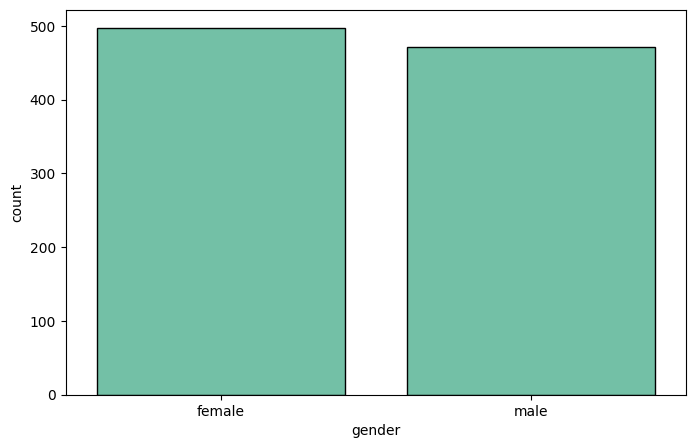

In [371]:
# recordemos como estaban distribuidos nuestros datos

plt.figure(figsize=(8,5)) # para cambiar el tamaño de la figura

fig1 = sns.countplot(data = df_estandarizado, x = "gender",  color = "mediumaquamarine",  edgecolor='black')
fig1.set(xticklabels=["female", "male"]) 
plt.show()

En un principio viendo la gráfica no vemos un balanceo muy significativo en nuestros datos. Realizaremos el procedimiento de forma analítica para ver el conteo de mujeres y hombres en nuestro dataframe.

In [372]:
df_estandarizado["gender"].value_counts()

0.0    497
1.0    471
Name: gender, dtype: int64

Nos reafirmamos en que nuestra variable respuesta no presenta desbalanceo, es decir, nuestros datos están muy equilibrados.

### Práctica de Desbalanceo de variable respuesta

Para practicar el desbalanceo hemos decidido hacernos una copia del dataframe estandarizado y codificado, aunque estos resultados que nos den no los usaremos a posteriori (es sólo práctica).

In [373]:
df_estandarizado_practicas = df_estandarizado.copy()
df_estandarizado_practicas.head()

,gender,parental_level_of_education,test_preparation_course,math_score,reading_score,writing_score,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,lunch_free/reduced,lunch_standard
0,0.0,4,1,0.374672,0.170737,0.375773,0.0,1.0,0.0,0.0,0.0,0,1
1,0.0,3,0,0.166770,1.450511,1.336613,0.0,0.0,1.0,0.0,0.0,0,1
2,0.0,5,1,1.622085,1.806004,1.679770,0.0,1.0,0.0,0.0,0.0,0,1
3,1.0,2,1,-1.357846,-0.895741,-1.683170,1.0,0.0,0.0,0.0,0.0,1,0
4,1.0,3,1,0.651875,0.597329,0.444404,0.0,0.0,1.0,0.0,0.0,0,1


In [374]:
df_estandarizado_practicas.shape

(968, 13)

In [375]:
# Separamos los datos en X e y
y = df_estandarizado_practicas['gender']
X = df_estandarizado_practicas.drop('gender', axis=1)


#Dividimos en sets de entrenamiento y test.
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

In [376]:
# Iniciamos el método.
os_us = SMOTETomek()

# Ajustamos el modelo.
X_train_res, y_train_res = os_us.fit_resample(X_train, y_train)

In [377]:
y_train.value_counts()

0.0    347
1.0    330
Name: gender, dtype: int64

In [378]:
y_train_res.value_counts()

0.0    248
1.0    248
Name: gender, dtype: int64

En este caso lo que hemos realizado es usar el método SMOTE donde generamos nuevos registros a partir de los datos de la clase minoritaria. El proceso que sigue es: elige datos de forma aleatoria de la clase minoritaria, seguidamente calcula la distancia entre los datos aleatorios y sus k vecinos más cercanos, multiplica la diferencia por un número aleatorio entre 0 y 1, y añade el resultado a la clase minoritaria como nueva muestra. Este proceso se repite hasta alcanzar la proporción deseada de la clase minoritaria, en nuestro caso ha sido 248 para cada valor único.

Guardad el dataframe con los cambios que habéis aplicado para utilizarlo en la siguiente lección.

In [379]:
df_estandarizado_solo.to_csv("resultados_estudiantes_solo_estandarizados.csv")
df_estandarizado.to_csv("resultados_estudiantes_estandarizados_codificados.csv")

Happy coding 📊📈📉